In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.api import qqplot
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
boston = load_boston()
x = boston.data.T[0]
y = boston.target

data = pd.DataFrame({
    'x1': x,
    'x2': x * 2,
    'y': y
})

In [4]:
data

,x1,x2,y
0,0.00632,0.01264,24.0
1,0.02731,0.05462,21.6
2,0.02729,0.05458,34.7
3,0.03237,0.06474,33.4
4,0.06905,0.13810,36.2
...,...,...,...
501,0.06263,0.12526,22.4
502,0.04527,0.09054,20.6
503,0.06076,0.12152,23.9
504,0.10959,0.21918,22.0


### Normality

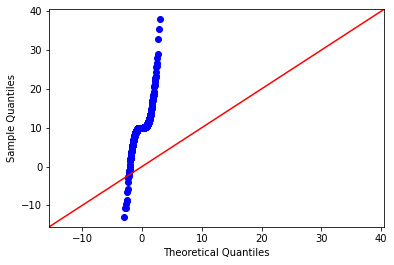

In [9]:
norm = st.norm(0, 1).rvs(1000) ** 3 + 10
qqplot(norm, line='45');

<Figure size 540x360 with 0 Axes>

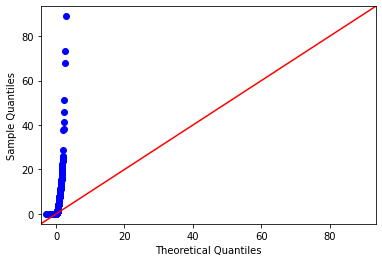

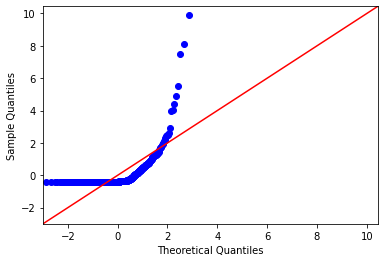

In [5]:
plt.figure(dpi=90)

qqplot(data['x1'], line='45');

data['x1'] = (data['x1'] - data['x1'].mean()) / data['x1'].std();

qqplot(data['x1'], line='45');

### Relation

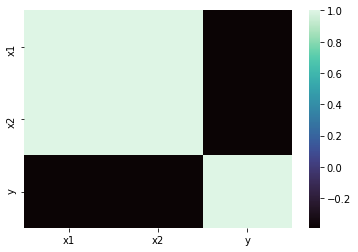

In [11]:
sns.heatmap(data.corr(), cmap='mako');

In [12]:
data.drop('x2', axis=1, inplace=True)

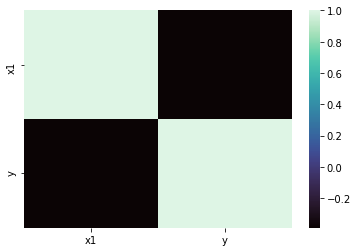

In [13]:
sns.heatmap(data.corr(), cmap='mako');

### Fit Line

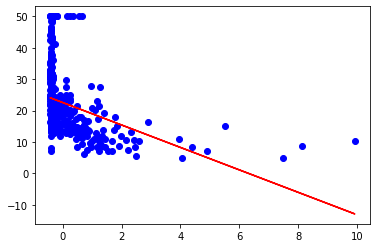

In [19]:
linReg = LinearRegression()
linReg.fit(data.x1.values.reshape(-1, 1), data.y)
y_hat = linReg.predict(data.x1.values.reshape(-1, 1))

plt.scatter(data.x1, data.y, color='blue')
plt.plot(data.x1, y_hat, color="red")

### Residuals

-497.9233747899704

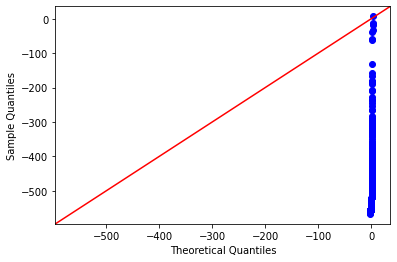

In [20]:
y = data['y'].values

MSEs = y - y_hat ** 2

qqplot(MSEs, line='45');

np.mean(MSEs)

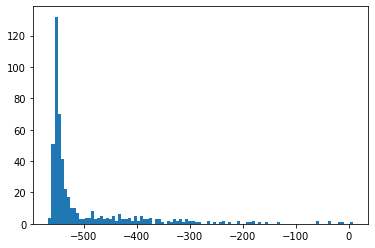

In [23]:
plt.hist(MSEs, bins=100);